In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [33]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [34]:
y_train.shape

(50000, 1)

In [35]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

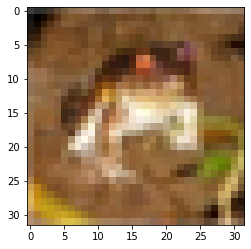

In [37]:
plt.imshow(X_train[0])

In [38]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [39]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [40]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [41]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [21]:
classes[9]

'truck'

In [42]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

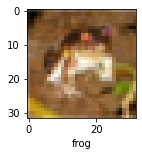

In [43]:
plot_sample(X_train, y_train, 0)

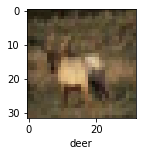

In [44]:
plot_sample(X_train, y_train, 3)

In [45]:
X_train = X_train/255
X_test = X_test/255

**ANN Model**

In [46]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 48s 31ms/step - loss: 1.8130 - accuracy: 0.3523
Epoch 2/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.6239 - accuracy: 0.4269
Epoch 3/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5410 - accuracy: 0.4561
Epoch 4/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4810 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.4301 - accuracy: 0.4969


In [47]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.42      0.49      1000
           1       0.71      0.47      0.57      1000
           2       0.25      0.61      0.36      1000
           3       0.36      0.30      0.33      1000
           4       0.55      0.21      0.30      1000
           5       0.50      0.26      0.34      1000
           6       0.41      0.68      0.51      1000
           7       0.54      0.55      0.54      1000
           8       0.59      0.64      0.61      1000
           9       0.65      0.46      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



**CNN Model**

In [48]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [49]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4468 - accuracy: 0.4800
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0894 - accuracy: 0.6195
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9589 - accuracy: 0.6672
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8722 - accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8024 - accuracy: 0.7194
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7440 - accuracy: 0.7399
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6926 - accuracy: 0.7592
Epoch 8/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.6478 - accuracy: 0.7739
Epoch 9/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.6014 - accuracy: 0.7905
Epoch 10/10
1563/1563 [==============================] - 32s 21m

**With CNN, at the end 5 epochs, accuracy was at around 71.94% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [50]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9034 - accuracy: 0.7094


[0.903392493724823, 0.7093999981880188]

In [51]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.3681007e-04, 6.6203276e-05, 2.4576304e-03, 6.2542671e-01,
        6.5444212e-05, 1.5941673e-03, 3.0551595e-04, 4.8291008e-06,
        3.6969471e-01, 1.4799478e-04],
       [4.3102188e-04, 2.0154597e-02, 5.6815878e-08, 5.8679115e-09,
        1.5424426e-08, 8.0923324e-10, 1.9368106e-10, 1.5415529e-10,
        9.7937852e-01, 3.5789017e-05],
       [4.1327570e-02, 1.6376925e-01, 4.0257181e-04, 1.2847307e-03,
        9.5726724e-04, 4.0395342e-05, 5.6256860e-04, 7.8472134e-04,
        7.6811892e-01, 2.2752061e-02],
       [8.1067038e-01, 3.1160124e-04, 3.2735620e-02, 2.0606734e-03,
        9.0851700e-03, 5.4440363e-05, 4.6857142e-05, 2.3124767e-03,
        1.4255212e-01, 1.7057087e-04],
       [2.4775608e-07, 5.1755075e-07, 6.5354146e-03, 4.7945483e-03,
        1.3579179e-01, 4.2534765e-04, 8.5245198e-01, 1.2168779e-07,
        2.2140373e-08, 1.1362566e-07]], dtype=float32)

In [52]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

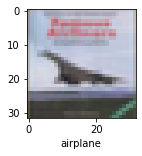

In [53]:
plot_sample(X_test, y_test,3)

In [54]:
classes[y_classes[3]]

'airplane'